In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv('data/titles.csv')
# pd.to_csv("xyz.csv") # Used to export dataframe as CSV file
titles.head()

,title,year
0,Jabiliamma Pelli,1996
1,Meteo,1990
2,Split Rail,2018
3,Brides of Sulu,1934
4,Loud,2014


In [4]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [5]:
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [6]:
cast.describe()

,year,n
count,3.786176e+06,2.327603e+06
mean,1.988911e+03,1.690599e+01
std,2.789225e+01,3.170679e+01
min,1.894000e+03,1.000000e+00
25%,1.970000e+03,5.000000e+00
50%,2.001000e+03,1.000000e+01
75%,2.012000e+03,2.100000e+01
max,2.115000e+03,3.361300e+04


In [7]:
# How many movies are listed in the titles dataframe?

len(titles)

244914

In [8]:
# What are the earliest two films listed in the titles dataframe?

titles.sort_values('year').head(2)

,title,year
8740,Miss Jerry,1894
148044,The Startled Lover,1898


In [9]:
# How many movies have the title "Hamlet"?

len(titles[titles.title == 'Hamlet'])

20

In [10]:
# How many movies are titled "North by Northwest"?

len(titles[titles.title == 'North by Northwest'])

1

In [11]:
# When was the first movie titled "Hamlet" made?

titles[titles.title == 'Hamlet'].sort_values('year').head(1)

,title,year
117841,Hamlet,1910


In [12]:
# List all of the "Treasure Island" movies from earliest to most recent.

titles[titles.title == 'Treasure Island'].sort_values('year')

,title,year
212389,Treasure Island,1918
228214,Treasure Island,1920
134450,Treasure Island,1934
104419,Treasure Island,1950
28561,Treasure Island,1972
148076,Treasure Island,1973
160314,Treasure Island,1985
230221,Treasure Island,1999


In [13]:
# How many movies were made in the year 1950?

len(titles[titles.year == 1950])

1113

In [14]:
# How many movies were made in the year 1960?

len(titles[titles.year == 1960])

1549

In [15]:
# How many movies were made from 1950 through 1959?

t = titles
len(t[(t.year >= 1950) & (t.year <= 1959)])

12934

In [16]:
len(t[t.year // 10 == 195])

12934

In [17]:
# In what years has a movie titled "Batman" been released?

t = titles
t[t.title == 'Batman']

,title,year
23405,Batman,1989
133410,Batman,1943


In [18]:
# How many roles were there in the movie "Inception"?

c = cast
len(c[c.title == 'Inception'])

78

In [19]:
# How many roles in the movie "Inception" are NOT ranked by an "n" value?

c = cast
c = c[c.title == 'Inception']
c = c[c.n.isnull()]
len(c)

27

In [20]:
# But how many roles in the movie "Inception" did receive an "n" value?

c = cast
c = c[c.title == 'Inception']
c = c[c.n.notnull()]
len(c)

51

In [21]:
# Display the cast of "North by Northwest" in their correct "n"-value order,
# ignoring roles that did not earn a numeric "n" value.

c = cast
c = c[c.title == 'North by Northwest']
c = c[c.n.notnull()]
c = c.sort_values('n')
c

,title,year,name,type,character,n
871426,North by Northwest,1959,Cary Grant,actor,Roger O. Thornhill,1.0
3518333,North by Northwest,1959,Eva Marie Saint,actress,Eve Kendall,2.0
1457165,North by Northwest,1959,James Mason,actor,Phillip Vandamm,3.0
3157232,North by Northwest,1959,Jessie Royce Landis,actress,Clara Thornhill,4.0
356707,North by Northwest,1959,Leo G. Carroll,actor,The Professor,5.0
3048272,North by Northwest,1959,Josephine Hutchinson,actress,Mrs. Townsend,6.0
1695173,North by Northwest,1959,Philip Ober,actor,Lester Townsend,7.0
1275337,North by Northwest,1959,Martin Landau,actor,Leonard,8.0
2447081,North by Northwest,1959,Adam Williams,actor,Valerian,9.0
1811387,North by Northwest,1959,Edward Platt,actor,Victor Larrabee,10.0


In [22]:
# Display the entire cast, in "n"-order, of the 1972 film "Sleuth".

c = cast
c = c[c.title == 'Sleuth']
c = c[c.year == 1972]
c = c.sort_values('n')
c

,title,year,name,type,character,n
1705394,Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1.0
326773,Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0
373876,Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0
1465483,Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
2724553,Sleuth,1972,Eve (III) Channing,actress,Marguerite Wyke,5.0
1448690,Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6.0


In [23]:
# Now display the entire cast, in "n"-order, of the 2007 version of "Sleuth".

c = cast
c = c[c.title == 'Sleuth']
c = c[c.year == 2007]
c = c.sort_values('n')
c

,title,year,name,type,character,n
326774,Sleuth,2007,Michael Caine,actor,Andrew,1.0
1293634,Sleuth,2007,Jude Law,actor,Milo,2.0
1805907,Sleuth,2007,Harold Pinter,actor,Man on T.V.,3.0
260242,Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
373877,Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN
2724552,Sleuth,2007,Eve (II) Channing,actress,Marguerite Wyke,NaN
3370424,Sleuth,2007,Carmel O'Sullivan,actress,Maggie,NaN


In [24]:
# How many roles were credited in the silent 1921 version of Hamlet?

c = cast
c = c[(c.title == 'Hamlet') & (c.year == 1921)]
len(c)

9

In [25]:
# How many roles were credited in Branagh’s 1996 Hamlet?

c = cast
c = c[(c.title == 'Hamlet') & (c.year == 1996)]
len(c)

54

In [26]:
# How many "Hamlet" roles have been listed in all film credits through history?

c = cast
c = c[c.character == 'Hamlet']
len(c)

96

In [27]:
# How many people have played an "Ophelia"?

c = cast
c = c[c.character == 'Ophelia']
len(c)

# That was my original answer.
# But 9peppe on GitHub points out I am wrong! Instead:

len(cast[cast.character == "Ophelia"].name.unique())

# Can you work out why the two answers are different?

115

In [28]:
# How many people have played a role called "The Dude"?

c = cast
c = c[c.character == 'The Dude'].name.unique()
len(c)

19

In [29]:
# How many people have played a role called "The Stranger"?

c = cast
len(c[c.character == 'The Stranger'].name.unique())


202

In [30]:
# How many roles has Sidney Poitier played throughout his career?

c = cast
c = c[c.name == 'Sidney Poitier']
len(c)

43

In [31]:
# How many roles has Judi Dench played?

c = cast
c = c[c.name == 'Judi Dench']
len(c)

55

In [32]:
# List the supporting roles (having n=2) played by Cary Grant in the 1940s,
# in order by year.

c = cast
c = c[c.name == 'Cary Grant']
c = c[c.year // 10 == 194]
c = c[c.n == 2]
c = c.sort_values('year')
c

,title,year,name,type,character,n
871423,My Favorite Wife,1940,Cary Grant,actor,Nick Arden,2.0
871433,Penny Serenade,1941,Cary Grant,actor,Roger Adams,2.0


In [33]:
# List the leading roles that Cary Grant played in the 1940s in order by year.

c = cast
c = c[c.name == 'Cary Grant']
c = c[c.year // 10 == 194]
c = c[c.n == 1 ]
c = c.sort_values('year')
c

,title,year,name,type,character,n
871448,The Howards of Virginia,1940,Cary Grant,actor,Matt Howard,1.0
871407,His Girl Friday,1940,Cary Grant,actor,Walter Burns,1.0
871450,The Philadelphia Story,1940,Cary Grant,actor,C. K. Dexter Haven,1.0
871438,Suspicion,1941,Cary Grant,actor,Johnnie Aysgarth,1.0
871452,The Talk of the Town,1942,Cary Grant,actor,Leopold Dilg,1.0
871429,Once Upon a Honeymoon,1942,Cary Grant,actor,Patrick 'Pat' O'Toole,1.0
871398,Destination Tokyo,1943,Cary Grant,actor,Capt. Cassidy,1.0
871422,Mr. Lucky,1943,Cary Grant,actor,Joe Adams -posing as Joe Bascopolous,1.0
871430,Once Upon a Time,1944,Cary Grant,actor,Jerry Flynn,1.0
871390,Arsenic and Old Lace,1944,Cary Grant,actor,Mortimer Brewster,1.0


In [34]:
# How many roles were available for actors in the 1950s?

c = cast
c = c[c.year // 10 == 195]
c = c[c.type == 'actor']
len(c)

157738

In [35]:
# How many roles were available for actresses in the 1950s?

c = cast
c = c[c.year // 10 == 195]
c = c[c.type == 'actress']
len(c)

57733

In [36]:
# How many leading roles (n=1) were available
# from the beginning of film history through 1980?

c = cast
c = c[c.year <= 1980]
c = c[c.n == 1]
len(c)

65140

In [37]:
# How many non-leading roles were available through
# from the beginning of film history through 1980?

c = cast
c = c[c.year <= 1980]
c = c[c.n != 1]
len(c)

1117667

In [38]:
# How many roles through 1980 were minor enough
# that they did not warrant a numeric "n" rank?

c = cast
c = c[c.year <= 1980]
c = c[c.n.isnull()]
len(c)

448347

In [39]:
# What are the ten most common movie names of all time?

titles.title.value_counts().head(10)

Hamlet                  20
Carmen                  17
Macbeth                 16
The Outsider            12
Temptation              12
Maya                    12
Honeymoon               11
Othello                 11
Freedom                 11
The Three Musketeers    11
Name: title, dtype: int64

In [40]:
# Which three years of the 1930s saw the most films released?

t = titles
t = t[t.year // 10 == 193]
t.year.value_counts().head(3)

1937    1224
1936    1169
1938    1163
Name: year, dtype: int64

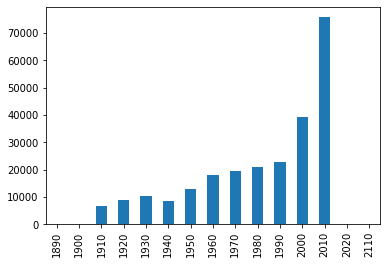

In [41]:
# Plot the number of films that have been released each decade
# over the history of cinema.

t = titles
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

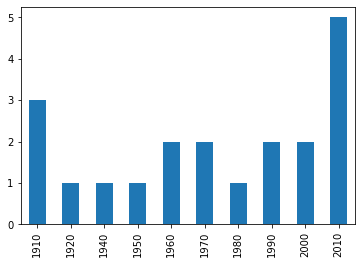

In [42]:
# Plot the number of "Hamlet" films made each decade.

t = titles
t = t[t.title == 'Hamlet']
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

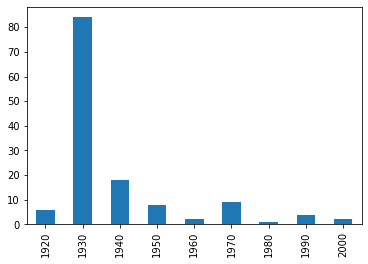

In [43]:
# Plot the number of "Rustler" characters
# in each decade of the history of film.

c = cast
c = c[c.character == 'Rustler']
(c.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

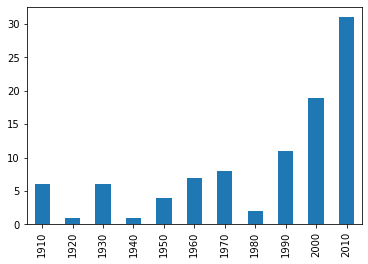

In [44]:
# Plot the number of "Hamlet" characters each decade.

c = cast
c = c[c.character == 'Hamlet']
(c.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

In [45]:
# What are the 11 most common character names in movie history?

cast.character.value_counts().head(11)

Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Herself         6705
Name: character, dtype: int64

In [46]:
# Who are the 10 people most often credited as "Herself" in film history?

c = cast
c[c.character == 'Herself'].name.value_counts().head(10)

Queen Elizabeth II        12
Mar?a Luisa (V) Mart?n     9
Joyce Brothers             9
Luisa Horga                9
Margaret Thatcher          8
Hillary Clinton            8
Rekha                      6
Joan Rivers                6
In?s J. Southern           6
Marilyn Monroe             6
Name: name, dtype: int64

In [47]:
# Who are the 10 people most often credited as "Himself" in film history?

c = cast
c[c.character == 'Himself'].name.value_counts().head(10)

Adolf Hitler          99
Richard Nixon         44
Ronald Reagan         41
John F. Kennedy       37
George W. Bush        25
Winston Churchill     24
Martin Luther King    23
Bill Clinton          22
Ron Jeremy            22
Benito Mussolini      21
Name: name, dtype: int64

In [48]:
# Which actors or actresses appeared in the most movies in the year 1945?

cast[cast.year == 1945].name.value_counts().head(10)

Emmett Vogan        39
Sam (II) Harris     33
Harold Miller       29
Bess Flowers        29
Frank O'Connor      27
Franklyn Farnum     27
Nolan Leary         27
Herman Hack         25
Larry Steers        25
Charles Sullivan    24
Name: name, dtype: int64

In [49]:
# Which actors or actresses appeared in the most movies in the year 1985?

cast[cast.year == 1985].name.value_counts().head(10)

Mammootty        22
Shakti Kapoor    21
Sukumari         20
Mohanlal         15
Aruna Irani      15
Raj Babbar       15
Lou Scheimer     15
Om Shivpuri      13
Rajesh Khanna    13
Deven Verma      13
Name: name, dtype: int64

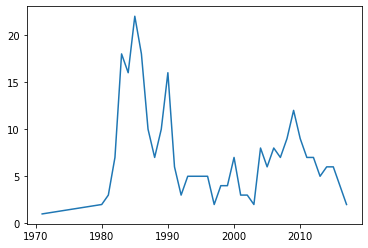

In [50]:
# Plot how many roles Mammootty has played in each year of his career.

cast[cast.name == 'Mammootty'].year.value_counts().sort_index().plot()

In [51]:
# What are the 10 most frequent roles that start with the phrase "Patron in"?

c = cast
c[c.character.str.startswith('Patron in ')].character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in the Coffee House       9
Patron in Chinese Restaurant     9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in restaurant             4
Patron in Restaurant             3
Patron in cabaret                3
Patron in Club                   3
Patron in Quiet Bar              2
Name: character, dtype: int64

In [52]:
# What are the 10 most frequent roles that start with the word "Science"?

c = cast
c[c.character.str.startswith('Science')].character.value_counts().head(10)

Science Teacher         60
Science Student          9
Science Fair Student     9
Science Fair Judge       6
Science Kid              5
Science Reporter         5
Science Fair Kid         5
Science Promo Cadet      5
Science Club Member      5
Science                  4
Name: character, dtype: int64

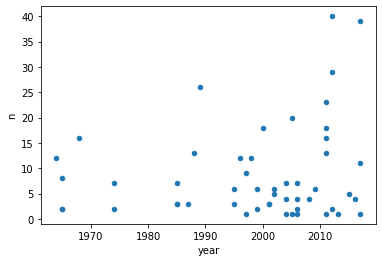

In [53]:
# Plot the n-values of the roles that Judi Dench has played over her career.

c = cast
c = c[c.name == 'Judi Dench']
c.plot(x='year', y='n', kind='scatter')

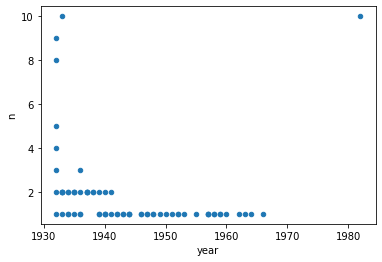

In [54]:
# Plot the n-values of Cary Grant's roles through his career.

c = cast
c = c[c.name == 'Cary Grant'].sort_values('year')
c = c[c.n.notnull()]
c.plot(x='year', y='n', kind='scatter')

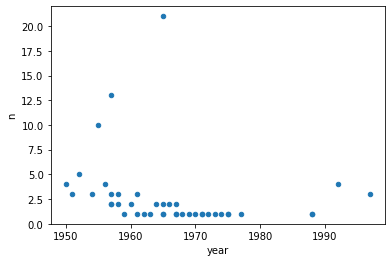

In [55]:
# Plot the n-value of the roles that Sidney Poitier has acted
# over the years.

c = cast
c = c[c.name == 'Sidney Poitier'].sort_values('year')
c = c[c.n.notnull()]
c.plot(x='year', y='n', kind='scatter')

In [56]:
# How many leading (n=1) roles were available to actors,
# and how many to actresses, in the 1950s?

c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 1]
c.type.value_counts()

actor      6692
actress    3040
Name: type, dtype: int64

In [57]:
# How many supporting (n=2) roles were available to actors,
# and how many to actresses, in the 1950s?

c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 2]
c.type.value_counts()

actor      4640
actress    4635
Name: type, dtype: int64

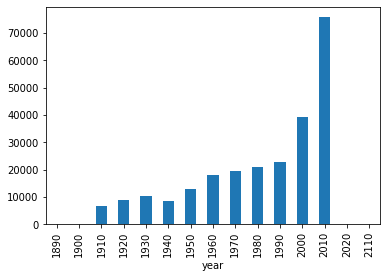

In [58]:
# Using groupby(), plot the number of films
# that have been released each decade in the history of cinema.

t = titles
t.groupby(t.year // 10 * 10).size().plot(kind='bar')

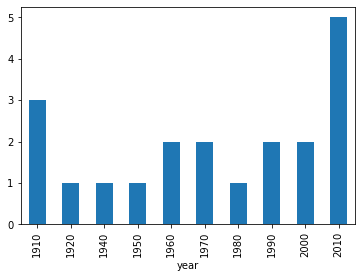

In [59]:
# Use groupby() to plot the number of "Hamlet" films made each decade.

t = titles
t = t[t.title == 'Hamlet']
t.groupby(t.year // 10 * 10).size().plot(kind='bar')

In [60]:
# How many leading (n=1) roles were available to actors,
# and how many to actresses, in each year of the 1950s?

c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 1]
c.groupby(['year', 'type']).size()

year  type   
1950  actor      625
      actress    288
1951  actor      651
      actress    285
1952  actor      613
      actress    304
1953  actor      664
      actress    312
1954  actor      636
      actress    316
1955  actor      648
      actress    285
1956  actor      668
      actress    307
1957  actor      739
      actress    315
1958  actor      715
      actress    301
1959  actor      733
      actress    327
dtype: int64

In [61]:
# In the 1950s decade taken as a whole,
# how many total roles were available to actors,
# and how many to actresses, for each "n" number 1 through 5?

c = cast
c = c[c.year // 10 * 10 == 1950]
c = c[c.n < 6]
c.groupby(['n', 'type']).size()

n    type   
1.0  actor      6692
     actress    3040
2.0  actor      4640
     actress    4635
3.0  actor      5654
     actress    3201
4.0  actor      5663
     actress    2881
5.0  actor      5674
     actress    2592
dtype: int64

In [62]:
# Use groupby() to determine how many roles are listed
# for each of the Pink Panther movies.

c = cast
c = c[c.title == 'The Pink Panther']
c = c.groupby(['year'])[['n']].max()
c

,n
year,
1963,15.0
2006,50.0


In [63]:
# List, in order by year, each of the films
# in which Frank Oz has played more than 1 role.

c = cast
c = c[c.name == 'Frank Oz']
g = c.groupby(['year', 'title']).size()
g[g > 1]

year  title                               
1979  The Muppet Movie                        8
1981  An American Werewolf in London          2
      The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

In [64]:
# List each of the characters that Frank Oz
# has portrayed at least twice.

c = cast
c = c[c.name == 'Frank Oz']
g = c.groupby(['character']).size()
g[g > 1].sort_values()

character
Grover            2
Bert              3
Fozzie Bear       4
Cookie Monster    5
Sam the Eagle     5
Animal            6
Miss Piggy        6
Yoda              6
dtype: int64

In [65]:
# Define a year as a "Superman year"
# whose films feature more Superman characters than Batman.
# How many years in film history have been Superman years?

c = cast
c = c[(c.character == 'Superman') | (c.character == 'Batman')]
c = c.groupby(['year', 'character']).size()
c = c.unstack()
c = c.fillna(0)
c.head()

character,Batman,Superman
year,,
1938,1.0,0.0
1940,1.0,0.0
1943,1.0,0.0
1948,0.0,1.0
1949,2.0,0.0


In [66]:
d = c.Superman - c.Batman
print('Superman years:')
print(len(d[d > 0.0]))

Superman years:
11


In [67]:
# How many years have been "Batman years",
# with more Batman characters than Superman characters?

print('Batman years:')
print(len(d[d < 0.0]))

Batman years:
27


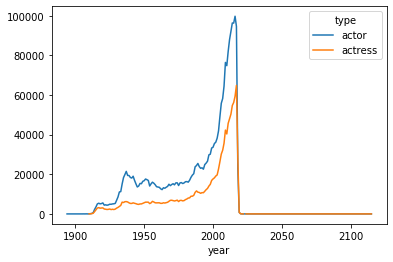

In [68]:
# Plot the number of actor roles each year
# and the number of actress roles each year
# over the history of film.

c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
c.plot()

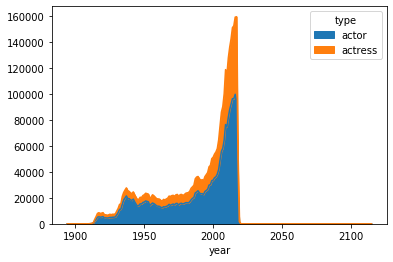

In [69]:
# Plot the number of actor roles each year
# and the number of actress roles each year,
# but this time as a kind='area' plot.

c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
c.plot(kind='area')

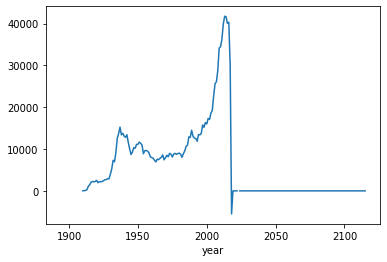

In [70]:
# Plot the difference between the number of actor roles each year
# and the number of actress roles each year over the history of film.

c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
(c.actor - c.actress).plot()

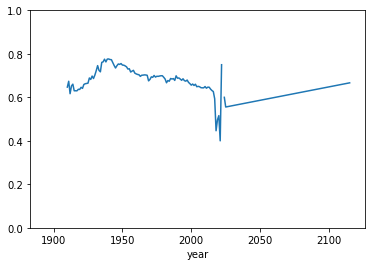

In [71]:
# Plot the fraction of roles that have been 'actor' roles
# each year in the history of film.

c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
(c.actor / (c.actor + c.actress)).plot(ylim=[0,1])

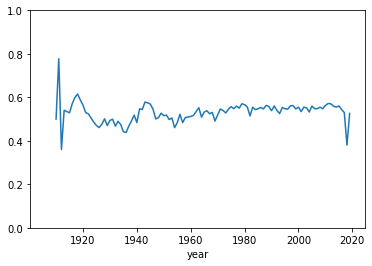

In [72]:
# Plot the fraction of supporting (n=2) roles
# that have been 'actor' roles
# each year in the history of film.

c = cast
c = c[c.n == 2]
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
(c.actor / (c.actor + c.actress)).plot(ylim=[0,1])

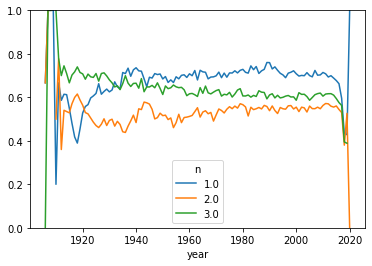

In [73]:
# Build a plot with a line for each rank n=1 through n=3,
# where the line shows what fraction of that rank's roles
# were 'actor' roles for each year in the history of film.

c = cast
c = c[c.n <= 3]
c = c.groupby(['year', 'type', 'n']).size()
c = c.unstack('type').fillna(0)
r = c.actor / (c.actor + c.actress)
r = r.unstack('n')
r.plot(ylim=[0,1])

In [74]:
release_dates = pd.read_csv('data/release_dates.csv', 
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


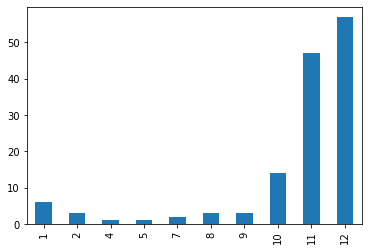

In [75]:
# Make a bar plot of the months in which movies
# with "Christmas" in their title tend to be released in the USA.

rd = release_dates
rd = rd[rd.title.str.contains('Christmas')]
rd = rd[rd.country == 'USA']
rd.date.dt.month.value_counts().sort_index().plot(kind='bar')

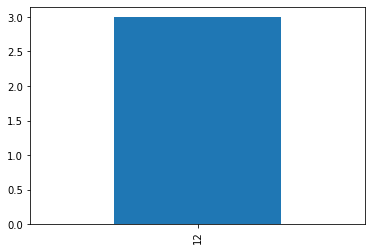

In [76]:
# Make a bar plot of the months in which movies
# whose titles start with "The Hobbit" are released in the USA.

rd = release_dates
rd = rd[rd.title.str.startswith('The Hobbit')]
rd = rd[rd.country == 'USA']
rd.date.dt.month.value_counts().sort_index().plot(kind='bar')

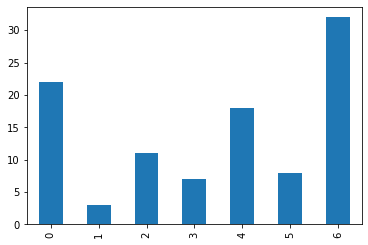

In [77]:
# Make a bar plot of the day of the week on which movies
# with "Romance" in their title tend to be released in the USA.

rd = release_dates
rd = rd[rd.title.str.contains('Romance')]
rd = rd[rd.country == 'USA']
rd.date.dt.dayofweek.value_counts().sort_index().plot(kind='bar')

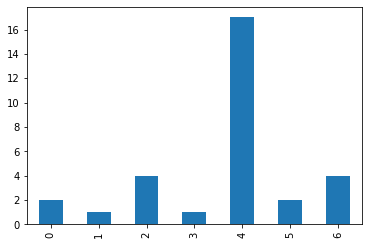

In [78]:
# Make a bar plot of the day of the week on which movies
# with "Action" in their title tend to be released in the USA.

rd = release_dates
rd = rd[rd.title.str.contains('Action')]
rd = rd[rd.country == 'USA']
rd.date.dt.dayofweek.value_counts().sort_index().plot(kind='bar')

In [79]:
# On which date was each Judi Dench movie from the 1990s released in the USA?

usa = release_dates[release_dates.country == 'USA']

c = cast
c = c[c.name == 'Judi Dench']
c = c[c.year // 10 * 10 == 1990]
c.merge(usa).sort_values('date')

,title,year,name,type,character,n,country,date
0,GoldenEye,1995,Judi Dench,actress,M,6.0,USA,1995-11-17
2,Jack & Sarah,1995,Judi Dench,actress,Margaret,3.0,USA,1996-03-22
1,Hamlet,1996,Judi Dench,actress,Hecuba,12.0,USA,1996-12-25
3,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1.0,USA,1997-10-03
7,Tomorrow Never Dies,1997,Judi Dench,actress,M,9.0,USA,1997-12-19
4,Shakespeare in Love,1998,Judi Dench,actress,Queen Elizabeth,12.0,USA,1999-01-08
5,Tea with Mussolini,1999,Judi Dench,actress,Arabella,2.0,USA,1999-05-14
6,The World Is Not Enough,1999,Judi Dench,actress,M,6.0,USA,1999-11-19


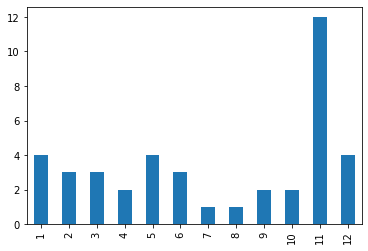

In [80]:
# In which months do films with Judi Dench tend to be released in the USA?

c = cast
c = c[c.name == 'Judi Dench']
m = c.merge(usa).sort_values('date')
m.date.dt.month.value_counts().sort_index().plot(kind='bar')

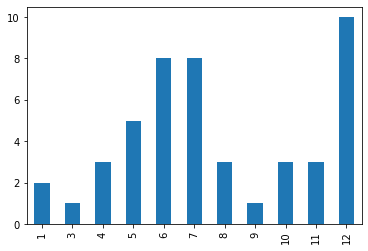

In [81]:
# In which months do films with Tom Cruise tend to be released in the USA?

c = cast
c = c[c.name == 'Tom Cruise']
m = c.merge(usa).sort_values('date')
m.date.dt.month.value_counts().sort_index().plot(kind='bar')

In [82]:
sales1 = pd.read_csv('sales1.csv')
sales1

,Book title,Number sold,Sales price,Royalty paid
0,The Bricklayer’s Bible,8,2.99,0.55
1,Swimrand,2,1.99,0.35
2,Pining For The Fisheries of Yore,28,2.99,0.55
3,The Duck Goes Here,34,2.99,0.55
4,The Tower Commission Report,4,11.50,4.25


In [83]:
sales2 = pd.read_csv('sales2.csv')
sales2.fillna('')

,Title,Units sold,List price,Royalty
0,,,,
1,Sales report for Q4,,,
2,E-Book Reader US Store,,,
3,Pining for the Fisheries of Yore,80,3.5,14.98
4,Swimrand,1,2.99,0.14
5,The Bricklayer's Bible,17,3.5,5.15
6,The Duck Goes Here,34,2.99,5.78
7,The Tower Commission Report,4,9.5,6.2
8,US royalties (USD),,,32.25
9,,,,


In [84]:
# Challenge: first combine these sales together into a single dataframe,
# then compute how much money consumers spent on each book in each currency.

In [85]:
df1 = sales1.rename(columns={
    'Book title': 'title',
    'Number sold': 'number',
    'Sales price': 'their_price',
    'Royalty paid': 'we_got',
    })
df1['currency'] = 'USD'
df1

,title,number,their_price,we_got,currency
0,The Bricklayer’s Bible,8,2.99,0.55,USD
1,Swimrand,2,1.99,0.35,USD
2,Pining For The Fisheries of Yore,28,2.99,0.55,USD
3,The Duck Goes Here,34,2.99,0.55,USD
4,The Tower Commission Report,4,11.50,4.25,USD


In [86]:
s = sales2.copy()
t = sales2['Title']
t = t.where(t.str.endswith(')')).str.split().str[-1].str.strip('()')
s['currency'] = t.fillna(method='bfill')
s = s[s['List price'].notnull()]
df2 = s.rename(columns={
    'Units sold': 'number',
    'Title': 'title',
    'List price': 'their_price',
    'Royalty': 'we_got',
    })
s.head()

,Title,Units sold,List price,Royalty,currency
3,Pining for the Fisheries of Yore,80.0,3.50,14.98,USD
4,Swimrand,1.0,2.99,0.14,USD
5,The Bricklayer's Bible,17.0,3.50,5.15,USD
6,The Duck Goes Here,34.0,2.99,5.78,USD
7,The Tower Commission Report,4.0,9.50,6.20,USD


In [87]:
df = pd.concat([df1, df2])
df

,title,number,their_price,we_got,currency
0,The Bricklayer’s Bible,8.0,2.99,0.55,USD
1,Swimrand,2.0,1.99,0.35,USD
2,Pining For The Fisheries of Yore,28.0,2.99,0.55,USD
3,The Duck Goes Here,34.0,2.99,0.55,USD
4,The Tower Commission Report,4.0,11.50,4.25,USD
3,Pining for the Fisheries of Yore,80.0,3.50,14.98,USD
4,Swimrand,1.0,2.99,0.14,USD
5,The Bricklayer's Bible,17.0,3.50,5.15,USD
6,The Duck Goes Here,34.0,2.99,5.78,USD
7,The Tower Commission Report,4.0,9.50,6.20,USD


In [88]:
# First try: differences in case and punctuation
# make some books look like two different entries.

t = df
t = t.assign(total_paid=t.their_price * t.number)
t.groupby(['title', 'currency'])[['total_paid']].sum()

total_paid
title                            currency            
Pining For The Fisheries of Yore USD            83.72
Pining for the Fisheries of Yore GBP           140.53
                                 USD           280.00
Swimrand                         EUR            15.92
                                 USD             6.97
The Bricklayer's Bible           GBP            50.83
                                 USD            59.50
The Bricklayer’s Bible           USD            23.92
The Duck Goes Here               EUR            23.88
                                 USD           203.32
The Tower Commission Report      GBP            26.00
                                 USD            84.00

In [89]:
# Second try: make book titles match by fixing differences
# in casing and punctuation.

t = df
t = t.assign(total_paid=t.their_price * t.number)
t = t.assign(title_fixed=t['title'].str.lower().str.replace("’", "'"))
t.groupby(['title_fixed', 'currency'])[['total_paid']].sum()

total_paid
title_fixed                      currency            
pining for the fisheries of yore GBP           140.53
                                 USD           363.72
swimrand                         EUR            15.92
                                 USD             6.97
the bricklayer's bible           GBP            50.83
                                 USD            83.42
the duck goes here               EUR            23.88
                                 USD           203.32
the tower commission report      GBP            26.00
                                 USD            84.00

***

***

***

## Stuff to explore further

* `stack()`, `unstack()`
* `merge()`, `concat()`
* `set_index()`, `sort_index()`, `reset_index()`
* Create DataFrames from dictionaries of various formats
* Export DataFrames as lists / numpy arrays / dictionaries (of various formats)
* Exploratory Data Analysis module in pandas
* `pd.read_excel()` and `pd.to_excel()` (can also deal with multiple sheets in the workbook)

### Cheat Sheet


```
  len(df)       series + value    	df[df.c == value]
  df.head()     series + series2  	df[(df.c >= value) & (df.d < value)]
  df.tail()     series.notnull()  	df[(df.c < value) | (df.d != value)]
  df.COLUMN     series.isnull()   	df.sort_values('column')
  df['COLUMN']  series.sort_index()	df.sort_values(['column1', 'column2'])

  s.str.len()        s.value_counts()
  s.str.contains()   s.sort_index()       df[['column1', 'column2']]
  s.str.startswith() s.plot(...)          df.plot(x='a', y='b', kind='bar')

  df.set_index('a').sort_index()        df.loc['value']
  df.set_index(['a', 'b']).sort_index() df.loc[('v','u')]
  df.groupby('column')                  .size() .mean() .min() .max()
  df.groupby(['column1', 'column2'])    .agg(['min', 'max'])

  df.unstack()      s.dt.year       df.merge(df2, how='outer', ...)
  df.stack()        s.dt.month      df.rename(columns={'a': 'y', 'b': 'z'})
  df.fillna(value)  s.dt.day        pd.concat([df1, df2])
  s.fillna(value)   s.dt.dayofweek
```